# Wind Farm Data Analysis
This notebook performs exploratory data analysis on wind farm SCADA data, including time series visualization, correlation analysis, and distribution plots.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



In [11]:
# Fonction pour charger et prétraiter les données
def load_and_preprocess_data(file_path):
    """Charge les données, les prétraite et renvoie un DataFrame."""
    df = pd.read_parquet(file_path)
    # Créer une colonne 'status_id' basée sur 'status_type_id'
    df['status_id'] = df['status_type_id'].map(lambda x: 'normal' if x in [0, 2] else 'not normal')

    # 1. Conversion des dates avec secondes
    ts1 = pd.to_datetime(df['time_stamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

    # 2. Conversion des dates sans secondes (jour/mois/année heures:minutes)
    ts2 = pd.to_datetime(df['time_stamp'], format='%d/%m/%Y %H:%M', errors='coerce')

    # 3. Combiner les deux résultats :
    #    on prend la valeur de ts1 si elle n'est pas NaT, sinon on prend celle de ts2
    df['time_stamp_parsed'] = ts1.fillna(ts2)
    # Réécriture de la colonne d'origine (ou création d'une nouvelle)
    df['time_stamp'] = df['time_stamp_parsed']

    return df

In [12]:
# Fonction pour l'analyse de séries chronologiques
def plot_time_series(df, csv_file_name, variable='wind_speed_3_avg'):
    """Trace la série chronologique d'une variable donnée."""
    train_data = df[df['train_test'] == 'train']
    test_data = df[df['train_test'] == 'prediction']

    plt.figure(figsize=(15, 7))
    plt.plot(train_data['time_stamp'], train_data[variable], color='blue', label='Train')
    plt.plot(test_data['time_stamp'], test_data[variable], color='orange', label='Prediction')
    plt.title(f'{variable} Over Time for {csv_file_name}')
    plt.xlabel('Time')
    plt.ylabel(variable)
    plt.legend()
    plt.show()

In [13]:
# Fonction pour l'analyse de corrélation
def plot_correlation_matrix(df, key_vars):
    """Trace la matrice de corrélation des variables clés."""
    corr_matrix = df[key_vars].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Key Variables')
    plt.tight_layout()
    plt.show()

In [14]:
# Fonction pour l'analyse de distribution
def plot_distributions(df, key_vars):
    """Trace les distributions des variables clés."""
    plt.figure(figsize=(15, 10))
    for i, var in enumerate(key_vars, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[var], kde=True)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
    plt.tight_layout()
    plt.show()

In [15]:
# Fonction pour l'analyse de la vitesse du vent par rapport à la puissance
def plot_wind_speed_vs_power(df):
    """Trace la vitesse du vent par rapport à la puissance."""
    plt.figure(figsize=(10, 6))
    plt.scatter(df['wind_speed_3_avg'], df['power_30_avg'], alpha=0.5)
    plt.title('Wind Speed vs Power Output')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Power Output (kW)')
    plt.show()

In [16]:
# Exemple d'utilisation
file_path = '/content/drive/MyDrive/GDM5 project/data/combined_data.parquet'
df = load_and_preprocess_data(file_path)


In [ ]:
key_vars = ['wind_speed_3_avg', 'power_30_avg', 'sensor_0_avg', 'sensor_1_avg', 'sensor_5_avg', 'sensor_18_avg']


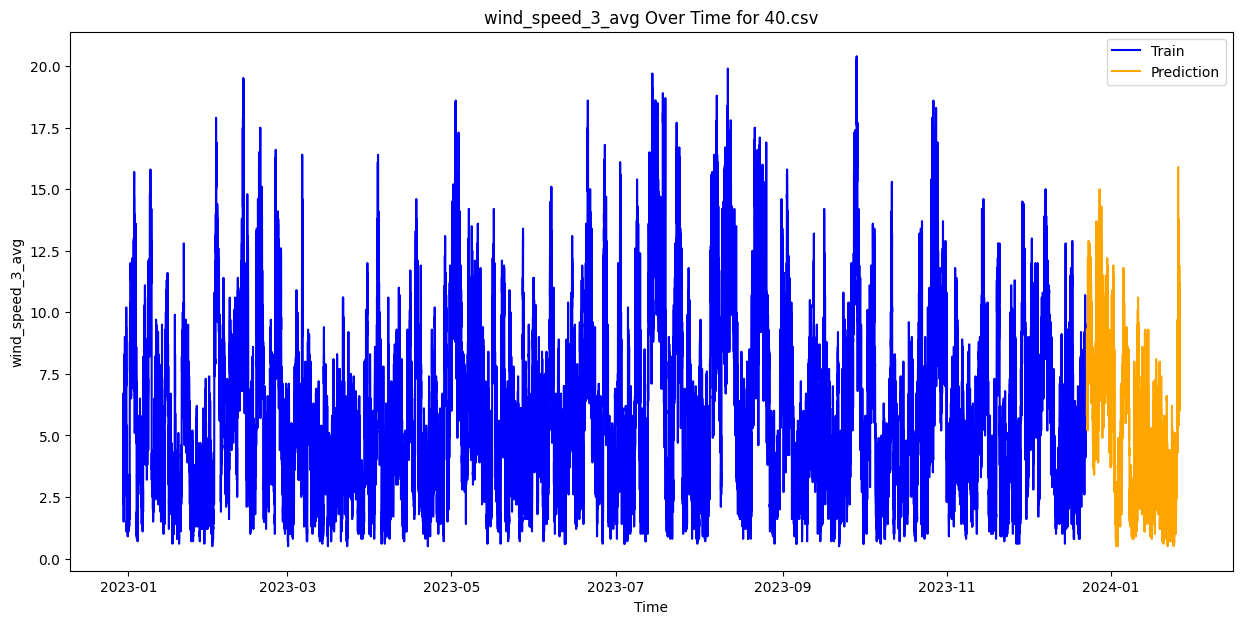

In [19]:
plot_time_series(df[df['name_file'] == '40.csv'], '40.csv')

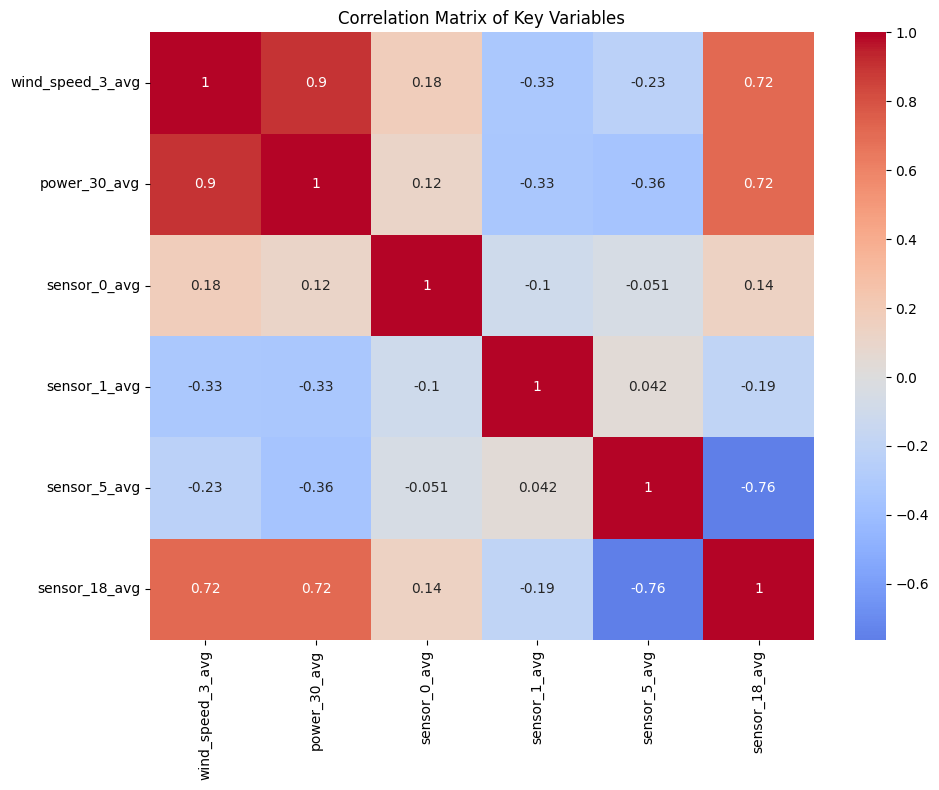

In [20]:
plot_correlation_matrix(df, key_vars)

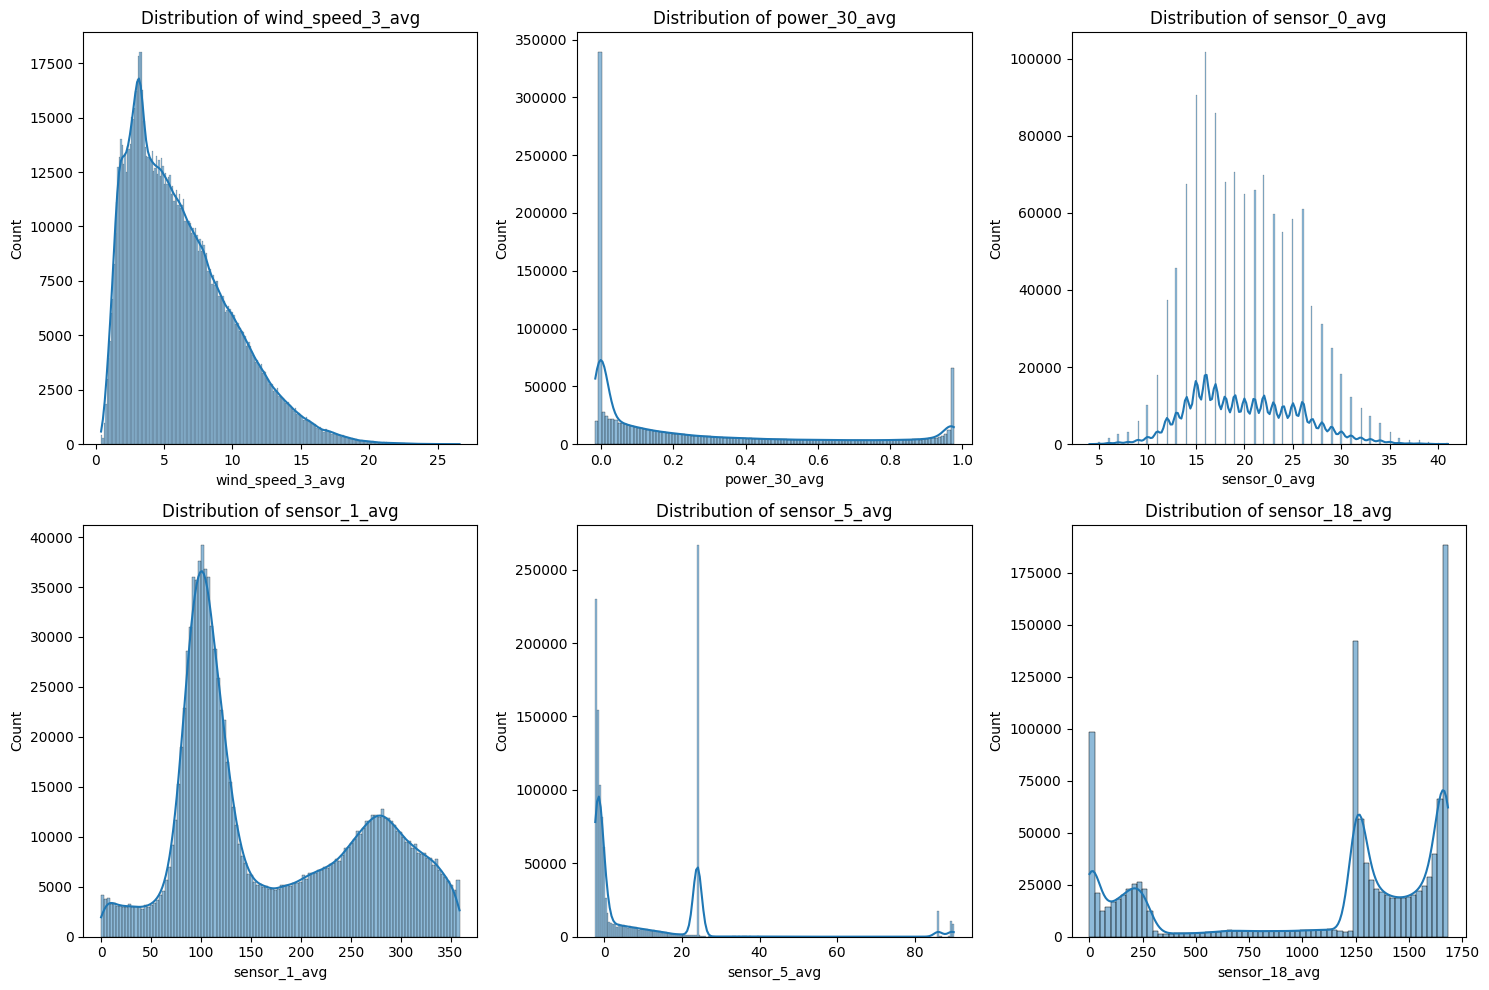

In [21]:
plot_distributions(df, key_vars)

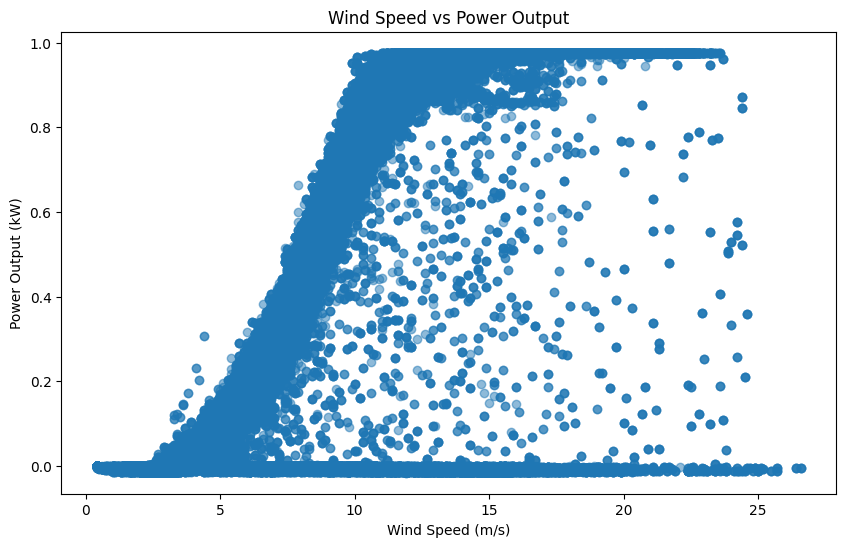

In [22]:
plot_wind_speed_vs_power(df)